In [1]:
## import all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing as sk_preprocessing
from sklearn import linear_model as sk_linear_model
from sklearn import metrics as sk_metrics

In [2]:
# read data from csv 
data = np.genfromtxt('Powertrain.csv', delimiter=',');
# map input data to meaningful variables
PowertrainForce_N = np.reshape(data[1:,0], (len(data)-1,1));
LongAcceleration_mps2 = np.reshape(data[1:,1], (len(data)-1,1));
LongVelocity_mps = np.reshape(data[1:,2], (len(data)-1,1));

## Visualize Data

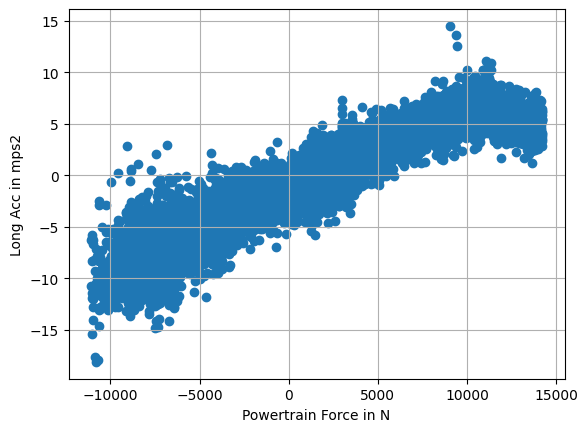

In [3]:
plt.scatter(PowertrainForce_N, LongAcceleration_mps2)
plt.grid(True)
plt.xlabel('Powertrain Force in N');
plt.ylabel('Long Acc in mps2');

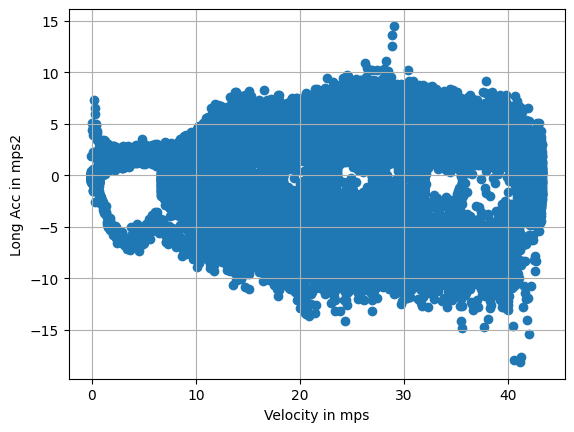

In [4]:
plt.scatter(LongVelocity_mps, LongAcceleration_mps2)
plt.grid(True)
plt.xlabel('Velocity in mps');
plt.ylabel('Long Acc in mps2');

## Apply standard regression
$$a_x = c_1F_{\mathrm{PT}} + c_0$$
$$a_x = \frac{1}{m}F_{\mathrm{PT}}$$

Coefficients: 
 [[-0.58698156  0.00067902]]
Vehicle mass:  1472.719722229053 kg


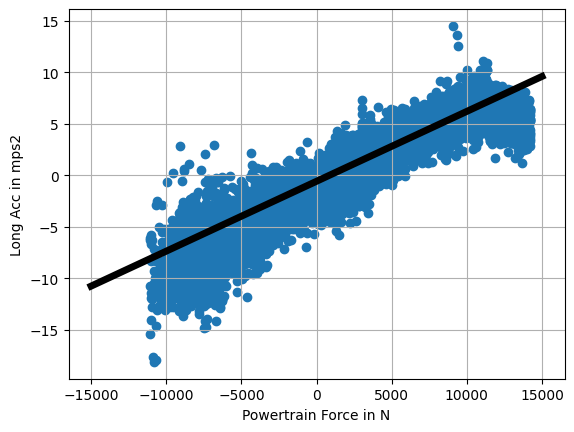

In [5]:
ols_PolyDegree = 1; 
ols_poly = sk_preprocessing.PolynomialFeatures(ols_PolyDegree);
ols_X_training = ols_poly.fit_transform(PowertrainForce_N);
ols_regr = sk_linear_model.LinearRegression(fit_intercept=False);
ols_regr.fit(ols_X_training, LongAcceleration_mps2);

## visualize results
PowertrainTestForce_N = np.reshape(np.linspace(-15000, 15000, 100), (100,1));
ols_X_plot = ols_poly.fit_transform(PowertrainTestForce_N);
ols_y_plot = ols_regr.predict(ols_X_plot);
plt.scatter(PowertrainForce_N, LongAcceleration_mps2)
plt.plot(PowertrainTestForce_N, ols_y_plot, color='black', linewidth=5)
plt.grid(True)
plt.xlabel('Powertrain Force in N');
plt.ylabel('Long Acc in mps2');
print('Coefficients: \n', ols_regr.coef_)

## calculate vehicle mass
print('Vehicle mass: ', 1/ols_regr.coef_[0,1], 'kg')

## Evaluate residuals

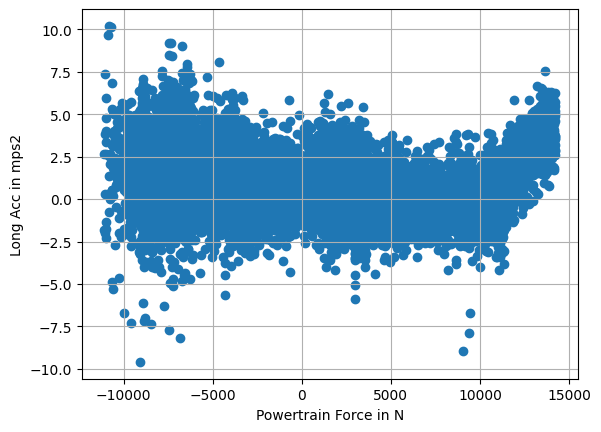

In [6]:
plt.scatter(PowertrainForce_N, ols_regr.predict(ols_X_training)-LongAcceleration_mps2)
plt.grid(True)
plt.xlabel('Powertrain Force in N');
plt.ylabel('Long Acc in mps2');

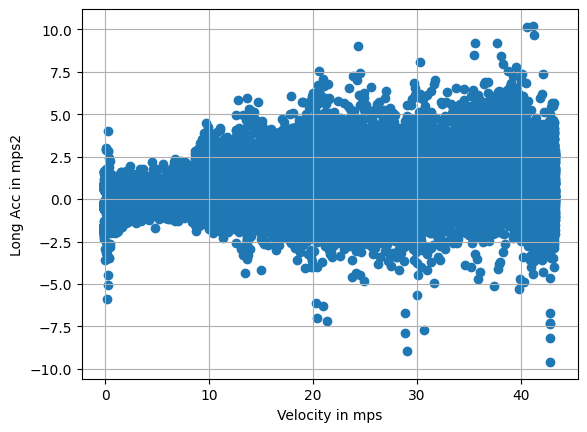

In [7]:
plt.scatter(LongVelocity_mps, ols_regr.predict(ols_X_training)-LongAcceleration_mps2)
plt.grid(True)
plt.xlabel('Velocity in mps');
plt.ylabel('Long Acc in mps2');

## Remove outliers

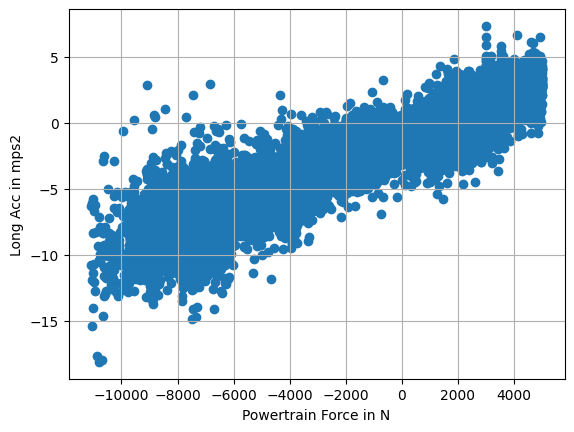

In [8]:
# get relevant data point indices
idx = np.where((PowertrainForce_N < 5000));
PowertrainForce_N_red = PowertrainForce_N[idx];
LongAcceleration_mps2_red = LongAcceleration_mps2[idx];
LongVelocity_mps_red = LongVelocity_mps[idx];
plt.scatter(PowertrainForce_N_red, LongAcceleration_mps2_red)
plt.grid(True)
plt.xlabel('Powertrain Force in N');
plt.ylabel('Long Acc in mps2');

## Apply regression

$$a_x = c_1F_{\mathrm{PT}} + c_0$$
$$a_x = \frac{1}{m}F_{\mathrm{PT}}$$

Coefficients: 
 [-0.55623202  0.00071874]
Vehicle mass:  1391.3252581133506 kg


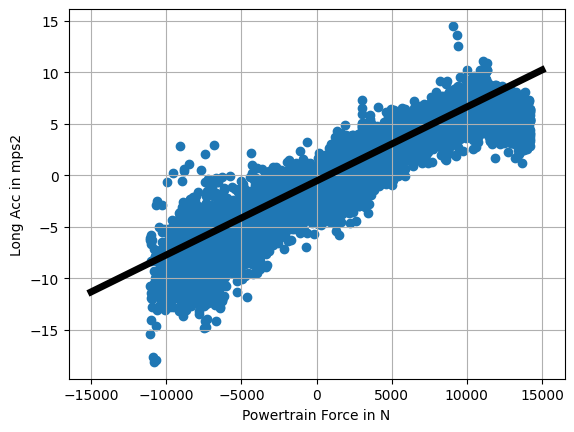

In [9]:
ols_PolyDegree = 1; 
ols_poly = sk_preprocessing.PolynomialFeatures(ols_PolyDegree);
ols_X_training_red = ols_poly.fit_transform(np.reshape(PowertrainForce_N_red, (len(PowertrainForce_N_red),1)));
ols_regr_out = sk_linear_model.LinearRegression(fit_intercept=False);
ols_regr_out.fit(ols_X_training_red, LongAcceleration_mps2_red);

## visualize results
PowertrainTestForce_N = np.reshape(np.linspace(-15000, 15000, 100), (100,1));
ols_X_plot = ols_poly.fit_transform(PowertrainTestForce_N);
ols_y_plot = ols_regr_out.predict(ols_X_plot);
plt.scatter(PowertrainForce_N, LongAcceleration_mps2)
plt.plot(PowertrainTestForce_N, ols_y_plot, color='black', linewidth=5)
plt.grid(True)
plt.xlabel('Powertrain Force in N');
plt.ylabel('Long Acc in mps2');
print('Coefficients: \n', ols_regr_out.coef_)

## calculate vehicle mass
print('Vehicle mass: ', 1/ols_regr_out.coef_[1], 'kg')

## Evaluate residuals

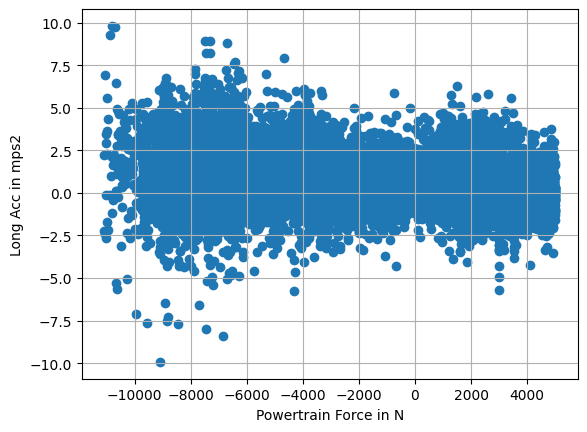

In [10]:
plt.scatter(PowertrainForce_N_red, ols_regr_out.predict(ols_X_training_red)-LongAcceleration_mps2_red)
plt.grid(True)
plt.xlabel('Powertrain Force in N');
plt.ylabel('Long Acc in mps2');

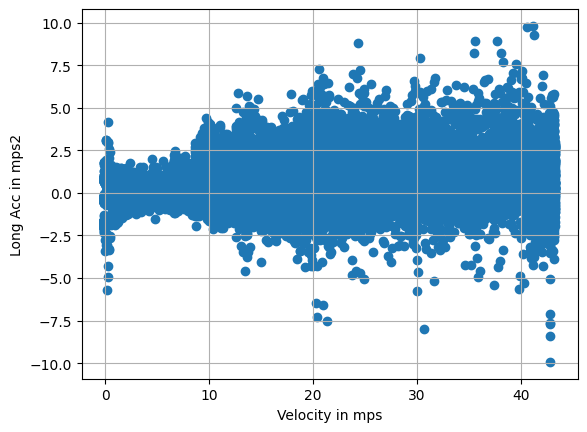

In [11]:
plt.scatter(LongVelocity_mps_red, ols_regr_out.predict(ols_X_training_red)-LongAcceleration_mps2_red)
plt.grid(True)
plt.xlabel('Velocity in mps');
plt.ylabel('Long Acc in mps2');

## Apply regression with velocity as additional input

$$a_x = c_1F_{\mathrm{PT}} + c_2v^2$$
$$a_x = \frac{1}{m}\left(F_{\mathrm{PT}} + c_wv^2\right)$$

Coefficients: 
 [ 0.00071965 -0.00135717]
Vehicle mass:  1389.5669465521155 kg


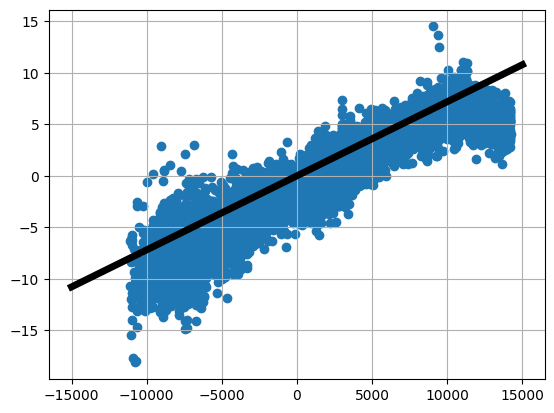

In [12]:
ols_PolyDegree = 1; 
ols_poly = sk_preprocessing.PolynomialFeatures(ols_PolyDegree);
# form matrix with feature vectors 
InputMatrix = np.concatenate((np.reshape(PowertrainForce_N_red, (len(PowertrainForce_N_red),1)), np.reshape(LongVelocity_mps_red**2, (len(LongVelocity_mps_red),1))), axis=1);
ols_regr_vel = sk_linear_model.LinearRegression(fit_intercept=False);
ols_regr_vel.fit(InputMatrix, LongAcceleration_mps2_red);

## visualize results
PowertrainTestForce_N = np.reshape(np.linspace(-15000, 15000, 100), (100,1));
PowertrainTestVelocity_N = np.zeros((100,1));
ols_X_plot = np.concatenate((np.reshape(PowertrainTestForce_N, (len(PowertrainTestForce_N),1)), np.reshape(PowertrainTestVelocity_N**2, (len(PowertrainTestVelocity_N),1))), axis=1);
ols_y_plot = ols_regr_vel.predict(ols_X_plot);
plt.scatter(PowertrainForce_N, LongAcceleration_mps2)
plt.plot(PowertrainTestForce_N, ols_y_plot, color='black', linewidth=5)
plt.grid(True)
print('Coefficients: \n', ols_regr_vel.coef_)

## calculate vehicle mass
print('Vehicle mass: ', 1/ols_regr_vel.coef_[0], 'kg')

## Evaluate residuals

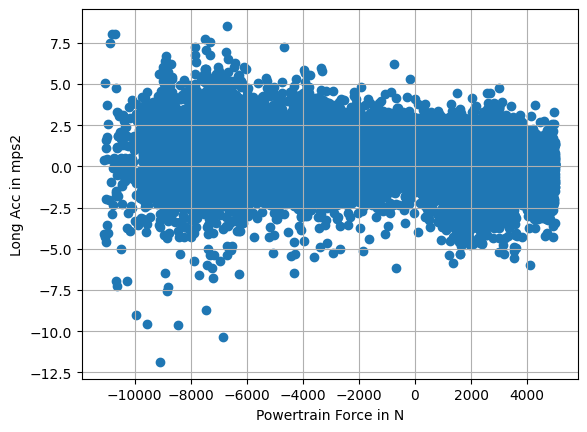

In [13]:
plt.scatter(PowertrainForce_N_red, ols_regr_vel.predict(InputMatrix)-LongAcceleration_mps2_red)
plt.grid(True)
plt.xlabel('Powertrain Force in N');
plt.ylabel('Long Acc in mps2');

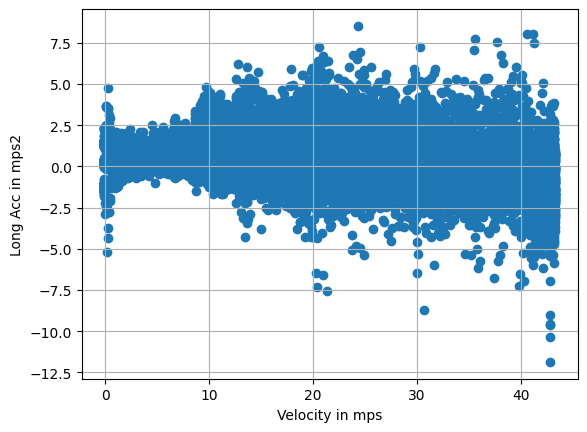

In [14]:
plt.scatter(LongVelocity_mps_red, ols_regr_vel.predict(InputMatrix)-LongAcceleration_mps2_red)
plt.grid(True)
plt.xlabel('Velocity in mps');
plt.ylabel('Long Acc in mps2');